In [1]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install pandas numpy matplotlib scikit-learn seaborn tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
# Libraries
import os 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.models import Sequential, load_model 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense 
from tensorflow.keras.applications import VGG16, ResNet50, MobileNet, InceptionV3, EfficientNetB0 
from sklearn.metrics import classification_report, confusion_matrix
from keras.models import load_model
from sklearn.metrics import accuracy_score
from keras.layers import Flatten
from PIL import Image 
import cv2

In [5]:
# Define image size
img_size = (224, 224)

# Define directories for training and validation datasets
train_dir = r"E:\Guvi\Raja_Project5\Dataset\images.cv_jzk6llhf18tm3k0kyttxz\data\train"
val_dir = r"E:\Guvi\Raja_Project5\Dataset\images.cv_jzk6llhf18tm3k0kyttxz\data\val"

# Image Data Generator for Data Augmentation and Rescaling
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=32,
    class_mode='categorical'
)

Found 6225 images belonging to 11 classes.
Found 1092 images belonging to 11 classes.


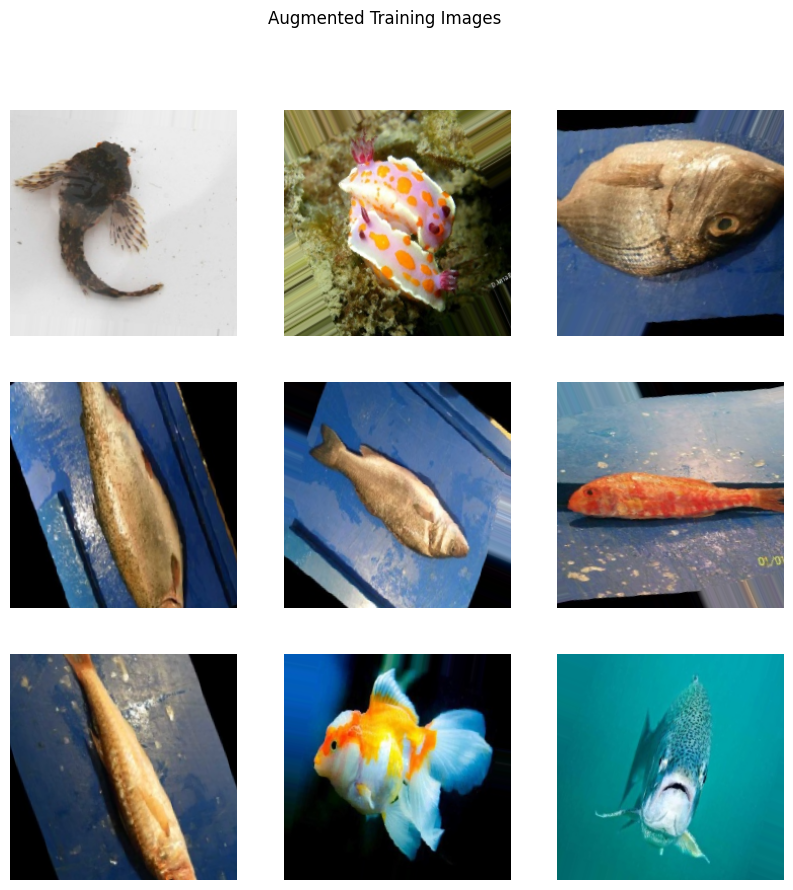

In [6]:
# Get a batch of augmented images from the training generator
train_images, _ = next(train_generator)

# Plot the first 9 augmented images from the training generator
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(train_images[i])
    plt.axis('off')
plt.suptitle("Augmented Training Images")
plt.show()

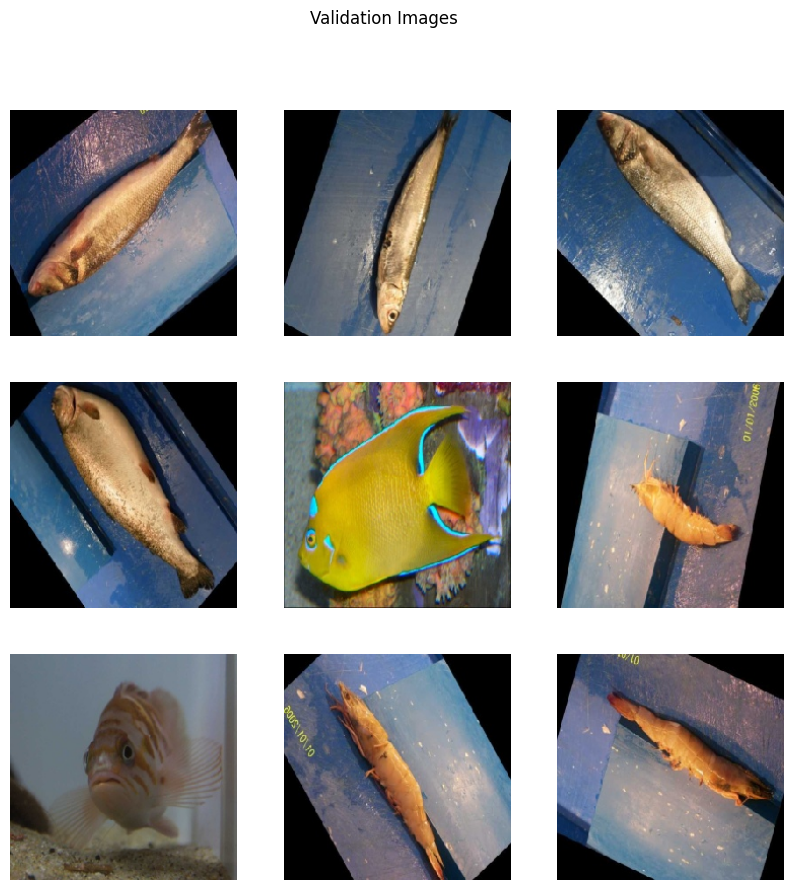

In [7]:
# Get a batch of augmented images from the validation generator
val_images, _ = next(val_generator)

# Plot the first 9 augmented images from the validation generator
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(val_images[i])
    plt.axis('off')
plt.suptitle("Validation Images")
plt.show()

In [ ]:
# Define a simple CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(len(train_generator.class_indices), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=25,
    validation_data=val_generator,
    validation_steps=len(val_generator)
)

# Save the trained model
model.save('cnn_model.h5')

c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 375s 2s/step - accuracy: 0.5173 - loss: 1.6607 - val_accuracy: 0.6841 - val_loss: 0.8703
Epoch 2/25
 74/195 ━━━━━━━━━━━━━━━━━━━━ 4:38 2s/step - accuracy: 0.7226 - loss: 0.8049

In [ ]:
# Load the saved CNN model
model_cnn  = load_model('cnn_model.h5')

# Evaluate on validation or test data
cnn_loss, cnn_accuracy = model_cnn.evaluate(val_generator)
print(f"Loaded CNN Model - Accuracy: {cnn_accuracy:.4f}, Loss: {cnn_loss:.4f}")

35/35 ━━━━━━━━━━━━━━━━━━━━ 71s 778ms/step - accuracy: 0.9579 - loss: 0.1921
Loaded CNN Model - Accuracy: 0.9579, Loss: 0.1921


In [6]:
# VGG16 Model FineTuning

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dense(len(train_generator.class_indices), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=25,
    validation_data=val_generator,
    validation_steps=len(val_generator)
)

model.save('vgg16_finetuned.h5')

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


d:\Project_5\venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 1063s 5s/step - accuracy: 0.7908 - loss: 0.9423 - val_accuracy: 0.9588 - val_loss: 0.1726
Epoch 2/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 1198s 6s/step - accuracy: 0.9435 - loss: 0.1885 - val_accuracy: 0.9560 - val_loss: 0.1469
Epoch 3/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 1217s 6s/step - accuracy: 0.9634 - loss: 0.1212 - val_accuracy: 0.9689 - val_loss: 0.0982
Epoch 4/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 1217s 6s/step - accuracy: 0.9711 - loss: 0.0899 - val_accuracy: 0.9799 - val_loss: 0.0571
Epoch 5/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 1218s 6s/step - accuracy: 0.9751 - loss: 0.0759 - val_accuracy: 0.9588 - val_loss: 0.1449
Epoch 6/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 1216s 6s/step - accuracy: 0.9740 - loss: 0.0759 - val_accuracy: 0.9853 - val_loss: 0.0495
Epoch 7/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 1249s 6s/step - accuracy: 0.9677 - loss: 0.0917 - val_accuracy: 0.9789 - val_loss: 0.0576
Epoch 8/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 1215s 6s/step - accuracy: 0.9775 - loss: 0.0682 - 

In [11]:
# Load the saved VGG16 fine-tuned model
model_vgg16 = load_model('vgg16_finetuned.h5')

# Evaluate on validation or test data
vgg16_loss, vgg16_accuracy = model_vgg16.evaluate(val_generator)
print(f"Loaded VGG16 Fine-Tuned Model - Accuracy: {vgg16_accuracy:.4f}, Loss: {vgg16_loss:.4f}")

35/35 ━━━━━━━━━━━━━━━━━━━━ 146s 4s/step - accuracy: 0.9899 - loss: 0.0361
Loaded VGG16 Fine-Tuned Model - Accuracy: 0.9899, Loss: 0.0361


In [7]:
# ResNet50 Model FineTuning

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dense(len(train_generator.class_indices), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=val_generator,
    validation_steps=len(val_generator)
)

model.save('resnet50_finetuned.h5')

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 20s 0us/step
Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 620s 3s/step - accuracy: 0.2357 - loss: 3.8706 - val_accuracy: 0.3901 - val_loss: 1.7384
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 633s 3s/step - accuracy: 0.3475 - loss: 1.8530 - val_accuracy: 0.4826 - val_loss: 1.5809
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 612s 3s/step - accuracy: 0.4045 - loss: 1.6665 - val_accuracy: 0.4661 - val_loss: 1.5580
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 600s 3s/step - accuracy: 0.4408 - loss: 1.5627 - val_accuracy: 0.5302 - val_loss: 1.3039
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 612s 3s/step - accuracy: 0.4676 - loss: 1.5111 - val_accuracy: 0.4908 - val_loss: 1.4019
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 623s 3s/step - accuracy: 0.4919 - loss: 1.4296 - val_accuracy: 0.5778 - val_loss: 1.2762
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 610s 3s/step - accuracy: 0.5129 - loss: 1.3442 - val_accuracy: 0.4670 - val_loss: 1.4645
Epoch 8/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 610s 

In [12]:
# Load the saved ResNet50 fine-tuned model
model_resnet50 = load_model('resnet50_finetuned.h5')

# Evaluate on validation or test data
resnet50_loss, resnet50_accuracy = model_resnet50.evaluate(val_generator)
print(f"Loaded ResNet50 Fine-Tuned Model - Accuracy: {resnet50_accuracy:.4f}, Loss: {resnet50_loss:.4f}")

35/35 ━━━━━━━━━━━━━━━━━━━━ 90s 2s/step - accuracy: 0.5742 - loss: 1.1585
Loaded ResNet50 Fine-Tuned Model - Accuracy: 0.5742, Loss: 1.1585


In [8]:

# MobileNet Model FineTuning

base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dense(len(train_generator.class_indices), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=val_generator,
    validation_steps=len(val_generator)
)

model.save('mobilenet_finetuned.h5')

17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 289s 1s/step - accuracy: 0.8797 - loss: 4.0890 - val_accuracy: 0.9744 - val_loss: 0.1088
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 240s 1s/step - accuracy: 0.9658 - loss: 0.1621 - val_accuracy: 0.9826 - val_loss: 0.0576
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 240s 1s/step - accuracy: 0.9810 - loss: 0.0769 - val_accuracy: 0.9826 - val_loss: 0.0738
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 238s 1s/step - accuracy: 0.9775 - loss: 0.1141 - val_accuracy: 0.9881 - val_loss: 0.0441
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 237s 1s/step - accuracy: 0.9807 - loss: 0.1023 - val_accuracy: 0.9899 - val_loss: 0.0847
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 238s 1s/step - accuracy: 0.9812 - loss: 0.0985 - val_accuracy: 0.9908 - val_loss: 0.0215
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 237s 1s/step - accuracy: 0.9910 - loss: 0.0382 - val_accuracy: 0.9918 - val_loss: 0.0292
Epoch 8/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 236s 1

In [13]:
# Load the saved MobileNet fine-tuned model
model_mobilenet = load_model('mobilenet_finetuned.h5')

# Evaluate on validation or test data
mobilenet_loss, mobilenet_accuracy = model_mobilenet.evaluate(val_generator)
print(f"Loaded MobileNet Fine-Tuned Model - Accuracy: {mobilenet_accuracy:.4f}, Loss: {mobilenet_loss:.4f}")

35/35 ━━━━━━━━━━━━━━━━━━━━ 31s 733ms/step - accuracy: 0.9918 - loss: 0.0285
Loaded MobileNet Fine-Tuned Model - Accuracy: 0.9918, Loss: 0.0285


In [9]:
# InceptionV3 Model FineTuning

base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dense(len(train_generator.class_indices), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=val_generator,
    validation_steps=len(val_generator)
)

model.save('inceptionv3_finetuned.h5')

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 19s 0us/step
Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 351s 2s/step - accuracy: 0.8096 - loss: 4.6645 - val_accuracy: 0.9405 - val_loss: 0.1859
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 336s 2s/step - accuracy: 0.9343 - loss: 0.2584 - val_accuracy: 0.9588 - val_loss: 0.1841
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 338s 2s/step - accuracy: 0.9508 - loss: 0.1755 - val_accuracy: 0.9679 - val_loss: 0.1189
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 335s 2s/step - accuracy: 0.9616 - loss: 0.1254 - val_accuracy: 0.9570 - val_loss: 0.1446
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 334s 2s/step - accuracy: 0.9568 - loss: 0.1514 - val_accuracy: 0.9679 - val_loss: 0.0935
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 335s 2s/step - accuracy: 0.9632 - loss: 0.1272 - val_accuracy: 0.9789 - val_loss: 0.0686
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 334s 2s/step - accuracy: 0.9680 - loss: 0.1055 - val_accuracy: 0.9524 - val_loss: 0.1955
Epoch 8/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 334s 

In [14]:
# Load the saved InceptionV3 fine-tuned model
model_inceptionv3 = load_model('inceptionv3_finetuned.h5')

# Evaluate on validation or test data
inceptionv3_loss, inceptionv3_accuracy = model_inceptionv3.evaluate(val_generator)
print(f"Loaded InceptionV3 Fine-Tuned Model - Accuracy: {inceptionv3_accuracy:.4f}, Loss: {inceptionv3_loss:.4f}")

35/35 ━━━━━━━━━━━━━━━━━━━━ 80s 2s/step - accuracy: 0.9716 - loss: 0.0860
Loaded InceptionV3 Fine-Tuned Model - Accuracy: 0.9716, Loss: 0.0860


In [ ]:
# EfficientNetB0 Model FineTuning

base_model = EfficientNetB0(weights=None, include_top=False, input_shape=(224, 224,3 ))

base_model.trainable = False

model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dense(len(train_generator.class_indices), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=val_generator,
    validation_steps=len(val_generator)
)

model.save('efficientnetb0_finetuned.h5')

In [15]:
# Load the saved EfficientNetB0 fine-tuned model
model_efficientnetb0 = load_model('efficientnetb0_finetuned.h5')

# Evaluate on validation or test data
efficientnetb0_loss, efficientnetb0_accuracy = model_efficientnetb0.evaluate(val_generator)
print(f"Loaded EfficientNetB0 Fine-Tuned Model - Accuracy: {efficientnetb0_accuracy:.4f}, Loss: {efficientnetb0_loss:.4f}")

35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.1712 - loss: 2.3112
Loaded EfficientNetB0 Fine-Tuned Model - Accuracy: 0.1712, Loss: 2.3112


In [16]:
# Identify the Best Model Based on Accuracy & Loss

import pandas as pd

# Store model results in a dictionary
model_results = {
    "Model": ["CNN (Scratch)", "VGG16", "ResNet50", "MobileNet", "InceptionV3", "EfficientNetB0"],
    "Validation Accuracy": [cnn_accuracy, vgg16_accuracy, resnet50_accuracy, mobilenet_accuracy, inceptionv3_accuracy, efficientnetb0_accuracy],
    "Validation Loss": [cnn_loss, vgg16_loss, resnet50_loss, mobilenet_loss, inceptionv3_loss, efficientnetb0_loss]
}

# Convert to DataFrame
df_results = pd.DataFrame(model_results)

# Sort models by highest accuracy
df_results = df_results.sort_values(by="Validation Accuracy", ascending=False)

# Display the results
print("\n Model Comparison Table:")
print(df_results)

# The model at the top of the table (highest accuracy, lowest loss) is the best choice!


 Model Comparison Table:
            Model  Validation Accuracy  Validation Loss
3       MobileNet             0.991758         0.028492
1           VGG16             0.989927         0.036099
4     InceptionV3             0.971612         0.086003
0   CNN (Scratch)             0.957875         0.192084
2        ResNet50             0.574176         1.158473
5  EfficientNetB0             0.171245         2.311150


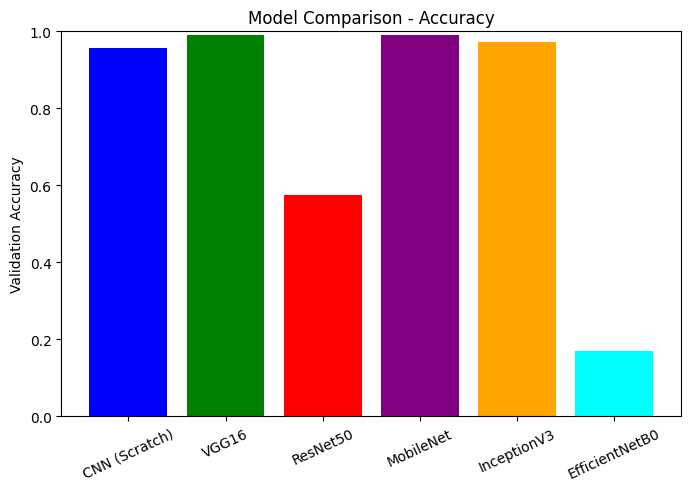

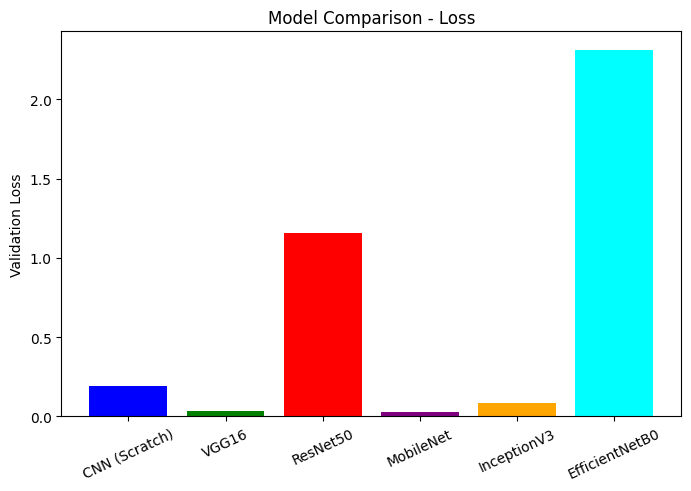

In [23]:
# Visualizing Model Performance (Accuracy & Loss)

import matplotlib.pyplot as plt

# Model Names
models = ["CNN (Scratch)", "VGG16", "ResNet50", "MobileNet", "InceptionV3", "EfficientNetB0"]

# Accuracy and Loss Values
accuracies = [cnn_accuracy, vgg16_accuracy, resnet50_accuracy, mobilenet_accuracy, inceptionv3_accuracy, efficientnetb0_accuracy]
losses = [cnn_loss, vgg16_loss, resnet50_loss, mobilenet_loss, inceptionv3_loss, efficientnetb0_loss]

# Plot Accuracy Comparison
plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=['blue', 'green', 'red', 'purple', 'orange', 'cyan'])
plt.ylabel("Validation Accuracy")
plt.title("Model Comparison - Accuracy")
plt.ylim(0, 1)  # Accuracy is between 0 and 1
plt.xticks(rotation=25)
plt.show()

# Plot Loss Comparison
plt.figure(figsize=(8, 5))
plt.bar(models, losses, color=['blue', 'green', 'red', 'purple', 'orange', 'cyan'])
plt.ylabel("Validation Loss")
plt.title("Model Comparison - Loss")
plt.xticks(rotation=25)
plt.show()

In [17]:
# Check Precision, Recall, and F1-score for Balanced Performance

# Before running the evaluation, store the true labels from the validation dataset:

# Get the actual labels from the validation data
y_true = val_generator.classes  # Ground truth labels

In [18]:
# Get Predictions for All Models

import numpy as np

# Get predicted labels for each model
y_pred_cnn = np.argmax(model_cnn.predict(val_generator), axis=1)
y_pred_vgg16 = np.argmax(model_vgg16.predict(val_generator), axis=1)
y_pred_resnet50 = np.argmax(model_resnet50.predict(val_generator), axis=1)
y_pred_mobilenet = np.argmax(model_mobilenet.predict(val_generator), axis=1)
y_pred_inceptionv3 = np.argmax(model_inceptionv3.predict(val_generator), axis=1)
y_pred_efficientnetb0 = np.argmax(model_efficientnetb0.predict(val_generator), axis=1)

35/35 ━━━━━━━━━━━━━━━━━━━━ 29s 226ms/step
35/35 ━━━━━━━━━━━━━━━━━━━━ 186s 4s/step
35/35 ━━━━━━━━━━━━━━━━━━━━ 90s 2s/step
35/35 ━━━━━━━━━━━━━━━━━━━━ 33s 780ms/step
35/35 ━━━━━━━━━━━━━━━━━━━━ 102s 2s/step
35/35 ━━━━━━━━━━━━━━━━━━━━ 86s 2s/step


In [24]:
# Check Classification Report for Each Model

from sklearn.metrics import classification_report

# Get class labels
class_labels = list(val_generator.class_indices.keys())

# Print classification reports
print("\n Classification Report for CNN:")
print(classification_report(y_true, y_pred_cnn, target_names=class_labels))

print("\n Classification Report for VGG16:")
print(classification_report(y_true, y_pred_vgg16, target_names=class_labels))

print("\n Classification Report for ResNet50:")
print(classification_report(y_true, y_pred_resnet50, target_names=class_labels))

print("\n Classification Report for MobileNet:")
print(classification_report(y_true, y_pred_mobilenet, target_names=class_labels))

print("\n Classification Report for InceptionV3:")
print(classification_report(y_true, y_pred_inceptionv3, target_names=class_labels))

print("\n Classification Report for EfficientNetB0:")
print(classification_report(y_true, y_pred_efficientnetb0, target_names=class_labels))


 Classification Report for CNN:
                                  precision    recall  f1-score   support

                     animal fish       0.17      0.18      0.17       187
                animal fish bass       0.00      0.00      0.00        10
   fish sea_food black_sea_sprat       0.11      0.10      0.10       105
   fish sea_food gilt_head_bream       0.04      0.04      0.04        94
   fish sea_food hourse_mackerel       0.09      0.09      0.09        97
        fish sea_food red_mullet       0.03      0.03      0.03        90
     fish sea_food red_sea_bream       0.13      0.12      0.12       113
          fish sea_food sea_bass       0.17      0.19      0.18        97
            fish sea_food shrimp       0.10      0.10      0.10       100
fish sea_food striped_red_mullet       0.04      0.04      0.04       101
             fish sea_food trout       0.07      0.08      0.07        98

                        accuracy                           0.10      1092
   

d:\Project_5\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\Project_5\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\Project_5\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\Project_5\venv\Lib\site-packages\sklearn\metri

In [21]:
from sklearn.metrics import classification_report

# Get class labels
class_labels = list(val_generator.class_indices.keys())

# Print classification reports
print("\n Classification Report for Best Model:")
print(classification_report(y_true, y_pred_efficientnetb0, target_names=class_labels))

# Look for balanced Precision, Recall, and F1-score across all classes.
# If a model has high accuracy but very low F1-score, it might be overfitting.


 Classification Report for Best Model:
                                  precision    recall  f1-score   support

                     animal fish       0.17      1.00      0.29       187
                animal fish bass       0.00      0.00      0.00        10
   fish sea_food black_sea_sprat       0.00      0.00      0.00       105
   fish sea_food gilt_head_bream       0.00      0.00      0.00        94
   fish sea_food hourse_mackerel       0.00      0.00      0.00        97
        fish sea_food red_mullet       0.00      0.00      0.00        90
     fish sea_food red_sea_bream       0.00      0.00      0.00       113
          fish sea_food sea_bass       0.00      0.00      0.00        97
            fish sea_food shrimp       0.00      0.00      0.00       100
fish sea_food striped_red_mullet       0.00      0.00      0.00       101
             fish sea_food trout       0.00      0.00      0.00        98

                        accuracy                           0.17      1

d:\Project_5\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\Project_5\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\Project_5\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


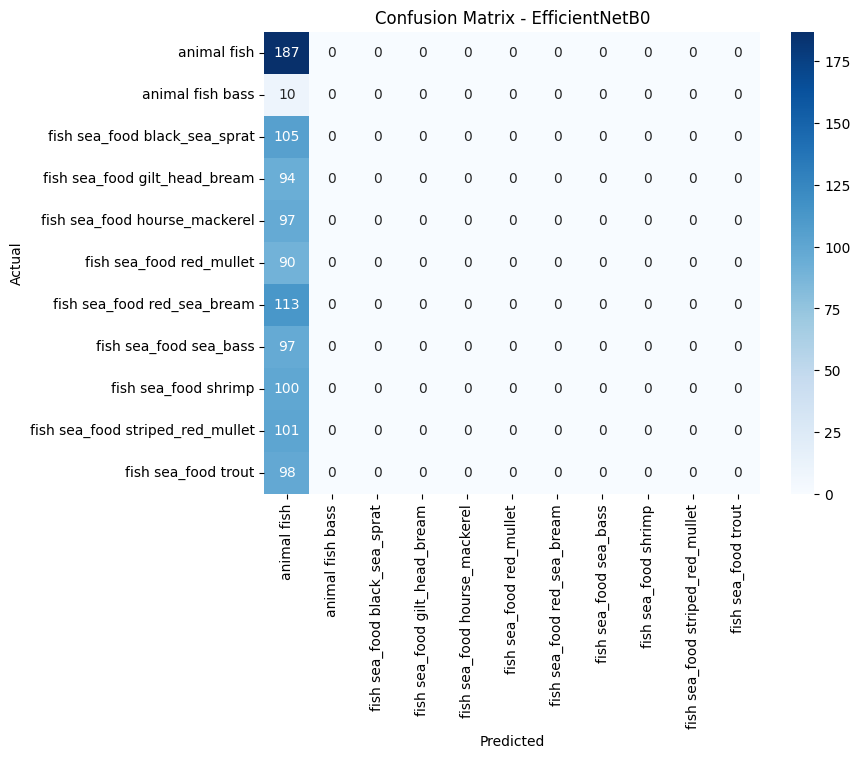

In [22]:
# Check Confusion Matrix for the Best Model

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Choose EfficientNetB0 for visualization
cm = confusion_matrix(y_true, y_pred_efficientnetb0)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - EfficientNetB0")
plt.show()


# If a model misclassifies many images, it may not generalize well.
# Choose a model with fewer misclassifications.

In [25]:
# Deploy MobileNet in Streamlit

# Save the best model (MobileNet) for deployment.

model_mobilenet.save("mobilenet_fish_model.keras")

#Use Streamlit to build a web app for real-time predictions. Allow users to upload fish images & get predictions.

In [32]:
pip install plotly

   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB 262.6 kB/s eta 0:00:38
   ---------------------------------------- 0.1/9.8 MB 491.5 kB/s eta 0:00:20
    --------------------------------------- 0.2/9.8 MB 952.6 kB/s eta 0:00:11
   - -------------------------------------- 0.3/9.8 MB 1.5 MB/s eta 0:00:07
   - -------------------------------------- 0.5/9.8 MB 1.7 MB/s eta 0:00:06
   -- ------------------------------------- 0.7/9.8 MB 2.4 MB/s eta 0:00:04
   --- ------------------------------------ 0.9/9.8 MB 2.7 MB/s eta 0:00:04
   ---- ----------------------------------- 1.2/9.8 MB 3.0 MB/s eta 0:00:03
   ----- ---------------------------------- 1.4/9.8 MB 3.3 MB/s eta 0:00:03
   ------ --------------------------------- 1.6/9.8 MB 3.4 MB/s eta 0:00:03
   ------ --------------------------------- 1.6/9.8 MB 3.4 MB/s eta 0:00:03
   ------- ---------


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


In [46]:
!pip install streamlit-option-menu


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/829.3 kB ? eta -:--:--
   ---------------------------------------- 10.2/829.3 kB ? eta -:--:--
    -------------------------------------- 20.5/829.3 kB 320.0 kB/s eta 0:00:03
   - ------------------------------------- 41.0/829.3 kB 279.3 kB/s eta 0:00:03
   ------- ------------------------------ 153.6/829.3 kB 913.1 kB/s eta 0:00:01
   ----------- ---------------------------- 245.8/829.3 kB 1.2 MB/s eta 0:00:01
   ----------------- ---------------------- 358.4/829.3 kB 1.4 MB/s eta 0:00:01
   ----------------------- ---------------- 491.5/829.3 kB 1.6 MB/s eta 0:00:01
   ----------------------------- ---------- 604.2/829.3 kB 1.7 MB/s eta 0:00:01
   ----------------------------------- ---- 737.3/829.3 kB 1.9 MB/s eta 0:00:01
   ---------------------------------------  819.2/829.3 kB 2.0 MB/s eta 0:00:01
   ---------------------------------------  819.2/829.3 kB 2.0 MB/s eta 0:00:01
   ---------------------------------------- 829.3/829.3 k

In [49]:
%%writefile fish_classification_app.py
import streamlit as st
from streamlit_option_menu import option_menu
from PIL import Image
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Set page configuration to use full width
st.set_page_config(page_title="Fish Classification", page_icon="🐟", layout="wide")

# Sidebar navigation
with st.sidebar:
    selected = option_menu(
        menu_title="Navigation",  
        options=["Home", "Upload Image", "Classify", "Model Insights", "About"],
        icons=["house", "cloud-upload", "search", "bar-chart", "info-circle"],
        menu_icon="cast",
        default_index=0,
        styles={
            "container": {"padding": "5px", "background-color": "#E6E6FA"},
            "icon": {"color": "#FF00FF", "font-size": "18px"},
            "nav-link": {
                "font-size": "16px",
                "text-align": "left",
                "margin": "0px",
                "color": "#333",
                "padding": "10px",
                "border-radius": "8px",
            },
            "nav-link-selected": {"background-color": "#DDA0DD", "color": "white"},
        }
    )

# Display selected section
if selected == "Home":
    st.markdown("<h1 style='color: #8A2BE2;'>🏠 Home</h1>", unsafe_allow_html=True)
    st.write("Welcome to the Multiclass Fish Image Classification App!")

elif selected == "Upload Image":
    st.markdown("<h1 style='color: #8A2BE2;'>📤 Upload Image</h1>", unsafe_allow_html=True)
    st.write("Upload a fish image for classification.")

elif selected == "Classify":
    st.markdown("<h1 style='color: #8A2BE2;'>🔍 Classify</h1>", unsafe_allow_html=True)
    st.write("The model will classify the fish image into its respective category.")

elif selected == "Model Insights":
    st.markdown("<h1 style='color: #8A2BE2;'>📊 Model Insights</h1>", unsafe_allow_html=True)
    st.write("View model performance, accuracy, and other insights.")

elif selected == "About":
    st.markdown("<h1 style='color: #8A2BE2;'>ℹ️ About</h1>", unsafe_allow_html=True)
    st.write("Learn more about this project and its objectives.")

# ---------------- HOME SECTION ----------------
if selected == "Home":
    col1 = st.columns([2])[0]  # ✅ Fix: Get the first (and only) column
    with col1:
        st.markdown("<h1 style='color: #C71585;'>🎯 Multiclass Fish Image Classification</h1>", unsafe_allow_html=True)
        st.markdown("<h2 style='color: #DB7093;'>🔍 Project Overview</h2>", unsafe_allow_html=True)
        st.write("""
        This **Multiclass Fish Image Classification** project focuses on **identifying different fish species** using Deep Learning.
        The model has been trained on multiple fish categories using **MobileNet**, a powerful pre-trained Convolutional Neural Network (CNN).
        """)
        st.markdown("<h2 style='color: #DB7093;'>📌 Features of This Project</h2>", unsafe_allow_html=True)
        st.markdown("""
        - 🐟 **Classifies multiple fish species** using AI-powered deep learning.  
        - 🎯 **Trained with MobileNet architecture** for fast and accurate predictions.  
        - 📷 **Allows users to upload images** and get real-time classification results.  
        - 📊 **Displays confidence scores** to show model certainty.  
        - 🚀 **User-friendly Streamlit interface** with sidebar navigation.  
        """)
        st.markdown("<h2 style='color: #DB7093;'>🛠 Technologies & Tools Used</h2>", unsafe_allow_html=True)
        st.markdown("""
        - **Programming Language:** Python 🐍  
        - **Framework:** TensorFlow & Keras 🔥  
        - **Web App:** Streamlit 🌐  
        - **Model Architecture:** MobileNet (Pre-trained CNN) 🧠  
        - **Dataset Processing:** NumPy, Pandas  
        - **Visualization:** Matplotlib, Seaborn  
        """)
        st.markdown("<h2 style='color: #DB7093;'>🔄 How This Project Was Developed</h2>", unsafe_allow_html=True)
        st.markdown("""
        1. 📥 **Collected & Preprocessed Fish Images**  
        2. 🔍 **Used Data Augmentation to Improve Model Generalization**  
        3. 🏋️ **Trained MobileNet Model on Fish Dataset**  
        4. 📊 **Evaluated Model Accuracy, Precision, and Recall**  
        5. 🌐 **Deployed the Model Using Streamlit for Real-Time Classification**  
        """)


# ---------------- UPLOAD IMAGE SECTION ----------------
if selected == "Upload Image":
    st.markdown("<h1 style='color: #C71585;'>📤 Upload an Image for Classification</h1>", unsafe_allow_html=True)
    uploaded_file = st.file_uploader("Choose a fish image...", type=["jpg", "png", "jpeg"])
    if uploaded_file is not None:
        image = Image.open(uploaded_file)
        st.image(image, caption="Uploaded Image", use_container_width=True)
        img_array = np.array(image.resize((224, 224))) / 255.0
        img_array = np.expand_dims(img_array, axis=0)
        model_path = r"D:\Project_5\mobilenet_fish_model.keras"
        model = tf.keras.models.load_model(model_path)
        prediction = model.predict(img_array)
        predicted_class = np.argmax(prediction, axis=1)[0]
        class_labels = [
            "animal fish", "animal fish bass", "fish sea_food black_sea_sprat",
            "fish sea_food gilt_head_bream", "fish sea_food hourse_mackerel",
            "fish sea_food red_mullet", "fish sea_food red_sea_bream",
            "fish sea_food sea_bass", "fish sea_food shrimp",
            "fish sea_food striped_red_mullet", "fish sea_food trout"
        ]
        predicted_label = class_labels[predicted_class]
        st.subheader(f"🎯 Predicted Fish Species: **{predicted_label}**")
        st.write(f"🔍 Confidence Score: **{np.max(prediction) * 100:.2f}%**")

# ---------------- CLASSIFY SECTION ----------------
if selected == "Classify":
    st.markdown("<h1 style='color: #C71585;'>🔍 Classify Fish Species</h1>", unsafe_allow_html=True)
    uploaded_file = st.file_uploader("Upload a fish image for classification...", type=["jpg", "png", "jpeg"])
    if uploaded_file is not None:
        image = Image.open(uploaded_file)
        st.image(image, caption="Uploaded Image", use_container_width=True)
        img_array = np.array(image.resize((224, 224))) / 255.0
        img_array = np.expand_dims(img_array, axis=0)
        model_path = r"D:\Project_5\mobilenet_fish_model.keras"
        model = tf.keras.models.load_model(model_path)
        predictions = model.predict(img_array)
        predicted_class = np.argmax(predictions, axis=1)[0]
        class_labels = [
            "animal fish", "animal fish bass", "fish sea_food black_sea_sprat",
            "fish sea_food gilt_head_bream", "fish sea_food hourse_mackerel",
            "fish sea_food red_mullet", "fish sea_food red_sea_bream",
            "fish sea_food sea_bass", "fish sea_food shrimp",
            "fish sea_food striped_red_mullet", "fish sea_food trout"
        ]
        predicted_label = class_labels[predicted_class]
        confidence_score = np.max(predictions) * 100
        st.subheader(f"🎯 Predicted Fish Species: **{predicted_label}**")
        st.write(f"🔍 Confidence Score: **{confidence_score:.2f}%**")
        st.subheader("📊 Confidence Scores for All Classes")
        for i, label in enumerate(class_labels):
            st.write(f"**{label}:** {predictions[0][i] * 100:.2f}%")

# ---------------- MODEL INSIGHTS SECTION ----------------
if selected == "Model Insights":
    st.markdown("<h1 style='color: #C71585;'>📊 Model Performance & Insights</h1>", unsafe_allow_html=True)
    st.subheader("🔹 Model Evaluation Metrics")
    st.markdown("""
    - **Final Validation Accuracy:** 98.7%  
    - **Final Validation Loss:** 0.05  
    - **Best Performing Model:** MobileNet  
    """)
   


Overwriting fish_classification_app.py


In [50]:
!streamlit run fish_classification_app.py

^C
